In [1]:
using PyCall
using PyPlot
using LaTeXStrings
using LinearAlgebra


Bad key text.latex.unicode in file /home/arurz/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /home/arurz/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /home/arurz/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://github.com/

In [2]:
mp = pyimport("mpmath")

PyObject <module 'mpmath' from '/home/arurz/.local/lib/python3.6/site-packages/mpmath/__init__.py'>

In [3]:
rc("text", usetex=true)

In [4]:
function nbinom(n,k); # Binomial coefficient in terms of the Gamma function
    return 1/((n+1)*convert(Float64,mp.beta(k+1, n-k+1)))
end

function krav(i,j) # Kravchuk symmetric polynomial in terms of 2F1
    return convert(Float64,mp.hyp2f1(-j,-i,-N,1/p,zeroprec = 250))
end
;

In [5]:
N = 32
dim = N+1
p = 1/2

t_list = range(0,stop=61,length=61)

;

In [6]:
function omega(j)
    return nbinom(N,j)*(p^j)*(1-p)^(N-j)
end

function h(i)
    return (((1-p)/p)^i)/(nbinom(N,i))
end
;

In [7]:
function K(i,j)
    return sqrt(omega(j)/h(i))*krav(i,j)
end
;

In [8]:
KT = zeros(Float64,(dim,dim))

for l in 0:N
    for m in 0:N
        KT[l+1,m+1] = K(l,m)
    end
end


In [9]:
function pint(a)
    pv = zeros(Float64,dim)
    for j in 0:N
        if a == j
            pv[j+1] = 1
        else
            pv[j+1] = 0
        end
    end
    return pv
end
;

In [10]:
function osc(t,n)
    return cos(t*sqrt(n))
end
;

In [11]:
oscm = zeros(Float64,(dim,length(t_list)))
@time for t in 1:length(t_list)
    for n in 0:N
        oscm[n+1,t]=osc(t_list[t],n)
    end
end

  0.193766 seconds (325.96 k allocations: 15.654 MiB)


In [12]:
icond1 = normalize(pint(0))

function q1(t,m)
    mevol = zeros(Float64,(dim,dim))
    for n in 0:N
        for l in 0:N
            mevol[n+1,l+1] = KT[m,n+1]*oscm[n+1,t]*KT[l+1,n+1]*icond1[l+1]
        end
    end
    return sum(mevol)
end

icond2 = normalize(pint(8)+pint(24))

function q2(t,m)
    mevol = zeros(Float64,(dim,dim))
    for n in 0:N
        for l in 0:N
            mevol[n+1,l+1] = KT[m,n+1]*oscm[n+1,t]*KT[l+1,n+1]*icond2[l+1]
        end
    end
    return sum(mevol)
end

icond3 = normalize(pint(16))

function q3(t,m)
    mevol = zeros(Float64,(dim,dim))
    for n in 0:N
        for l in 0:N
            mevol[n+1,l+1] = KT[m,n+1]*oscm[n+1,t]*KT[l+1,n+1]*icond3[l+1]
        end
    end
    return sum(mevol)
end
;

In [13]:
evolt1 = zeros(Float64,(dim,length(t_list)))
for t in 1:length(t_list)
    for n in 0:N    
       evolt1[n+1,t] = q1(t,n+1)
    end
end

evolt2 = zeros(Float64,(dim,length(t_list)))
for t in 1:length(t_list)
    for n in 0:N    
       evolt2[n+1,t] = q2(t,n+1)
    end
end

evolt3 = zeros(Float64,(dim,length(t_list)))
for t in 1:length(t_list)
    for n in 0:N    
       evolt3[n+1,t] = q3(t,n+1)
    end
end

In [14]:
vminh=-1 #minimum((minimum(evolt1),minimum(evolt2),minimum(evolt3)))
vmaxh=maximum((maximum(evolt1),maximum(evolt2),maximum(evolt3)))
;

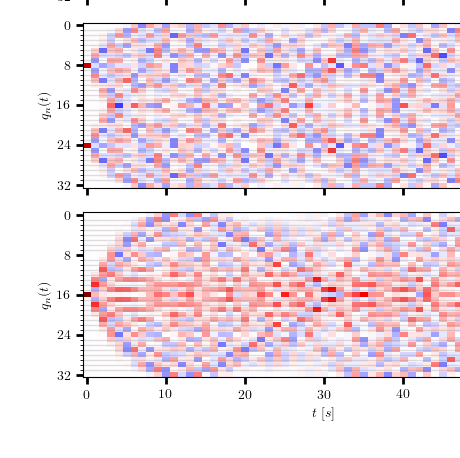

In [20]:
cm = "seismic"

ww = 6.20
hh = ww

fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(ww,hh),sharex=true)
plt.subplots_adjust(hspace = 0.1)

ax1.imshow(evolt1,vmin=vminh,vmax=vmaxh,cmap=cm)
ax2.imshow(evolt2,vmin=vminh,vmax=vmaxh,cmap=cm)
ax3.imshow(evolt3,vmin=vminh,vmax=vmaxh,cmap=cm)

ax1.set_aspect("auto")
ax2.set_aspect("auto")
ax3.set_aspect("auto")

ax1.tick_params(direction="out",length=5,width=2,labelsize=10)
ax2.tick_params(direction="out",length=5,width=2,labelsize=10)
ax3.tick_params(direction="out",length=5,width=2,labelsize=10)

ax1.set_yticks(0:8:N, minor = false)
ax2.set_yticks(0:8:N, minor = false)
ax3.set_yticks(0:8:N, minor = false)

ax1.set_yticks(1:1:N, minor = true)
ax1.grid(which = "minor", color = "gray", linestyle = "-", linewidth = 1, alpha = 0.25)
ax2.set_yticks(1:1:N, minor = true)
ax2.grid(which = "minor", color = "gray", linestyle = "-", linewidth = 1, alpha = 0.25)
ax3.set_yticks(1:1:N, minor = true)
ax3.grid(which = "minor", color = "gray", linestyle = "-", linewidth = 1, alpha = 0.25)

ax1.set_ylabel(L"q_{n}(t)",fontsize=10)
ax2.set_ylabel(L"q_{n}(t)",fontsize=10)
ax3.set_ylabel(L"q_{n}(t)",fontsize=10)

ax3.set_xlabel(L"t\ [s]",fontsize=10)

pcm = ax1.get_children()[10]
cb = colorbar(pcm,ax=(ax1,ax2,ax3),extend="both",ticks=[-1,-0.5,0,0.5,1],orientation="vertical",shrink=0.7,aspect=35,fraction=0.015)
cb.ax.tick_params(labelsize=10,length=5,width=1,direction="inout")
#cb.ax.set_ylabel("Amplitud",fontsize=12,labelpad=0)

tight_layout(rect=(0, 0, 0.9, 1))
show()

savefig("krav_vd.pdf", transparent = "true", dpi=300, bbox_inches="tight", pad_inches=0)